### OPERATORNORM WITHOUT ADJOINT 

- Creator:  Jonas Bresch, M.Sc
- Date: August 12rd, 2024

In [637]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from skimage . transform import radon , iradon
import cv2

import imp

In [638]:
import adjointfreenorm
imp.reload(adjointfreenorm)

<module 'adjointfreenorm' from '/Users/jonasbresch/Desktop/operator norm without adjoint/github/adjointfreenorm.py'>

### DATA

In [487]:
#
# random matrix
#

A = np.eye(100) + 1/np.random.randn(100,100)/1000000
A = np.random.randn(100,50)
V = np.random.randn(50, 100)

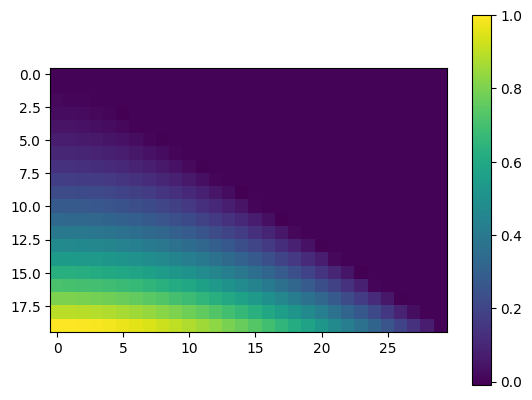

In [421]:
#
# Volterra - operator
#

n = 2*10
m = 2*15
A = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        #if j-1 <= m/n*i:
        #    A[i,j] = 1 # * ((i/(n-1))**2 - (j/(m-1))**2) # np.exp(i/(n-1) - j/(n-1))    (i/(n-1) - j/(n-1))    ((i/(n-1))**2 - (j/(n-1))**2)
        if j < m/n*i:
            A[i,j] = 1 * ((i/(n-1))**2 - (j/(m-1))**2)
        elif m/n*i <= j < m/n*i+1:
            a = n/m * i
            ra = a - np.floor(a)
            A[i,j] = 1 * (1 - ra) * ((i/(n-1))**2 - (j/(m-1))**2)
            


plt.imshow(A)
plt.colorbar()

In [557]:
#
# random orthogonal matrix
#

n = 1000
H = np.random.randn(n, n)
Q, R = sc.linalg.qr(H)
A = Q.dot(Q.T)

In [120]:
#
# special matrices
#

A = [1,0,0,0,0]
A = np.diag(A)

In [126]:
#
# marix with singular values 1/n**2
#

A = np.zeros((1000,1000))
d = np.size(A[0,:])
for i in range(d):
    #A[d-1-i,d-1-i] = 1 - 1/int(i+1)
    A[i,i] = 1 - 1/int(i+1)

In [ ]:
#
# test-matrices for the power iteration
#

ee = 1e-2
B = np.array([[1, ee, 0], [ 0, 1, 0], [0, 0, 1]])
n = 10
B = np.eye(n)
# B[0,0] = B[1,1] = 1
B[0,1] = ee
# B = np.array([[1, ee], [ 0, 1]])
BB = B.T @ B

### SETTING

In [11]:
#
# creating upper bounds and actual largest singular vector
#

valsol = np.max(np.linalg.eigh(np.transpose(A)@A)[0])
valsolmin = np.min(np.linalg.eigh(np.transpose(A)@A)[0])

In [141]:
# BB, 1/2*(ee**2 + np.sqrt(ee**2 + 4)*ee + 2)

In [142]:
vp = adjointfreenorm.power_iter(np.dot(A.T, A), 100)

KeyboardInterrupt: 

In [97]:
np.linalg.norm(np.dot(A.T, A) @ vp)

888.0305133820656

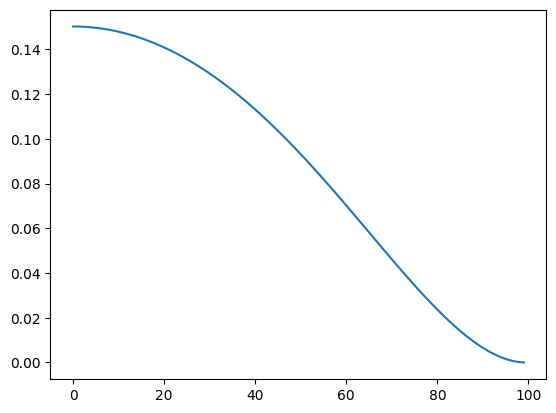

In [98]:
plt.plot(np.abs(vp))

In [146]:
np.linalg.norm(A, ord=2)**2

In [558]:
vv, optvv, vvval, listtau, lista, listerror = adjointfreenorm.MatFreeAdjNorm(A=A, iter=100001, eps=1e-8, nor=1)

iter. 	| func-value 	| res.  	| tau  		| alpha 	| beta  	| h^(1)(tau) 	| h^(2)(tau) 	| update 	| error
------------------------------------------------------------------------------------------------------------------------------------------------------
0 	|  1.000e+00 	|  7.550e-15 	| --- 		| --- 		| --- 		| --- 		| --- 		| --- 		| ---
A is orthogonal/unitar with ||A|| =  0.9999999999999996 a_0 =  0.0


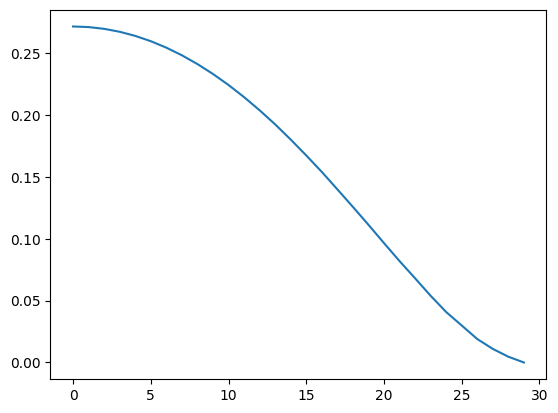

In [423]:
plt.plot(np.abs(vv))

In [71]:
plt.plot(np.abs(lista))
plt.yscale('log')
plt.xscale('log')

NameError: name 'lista' is not defined

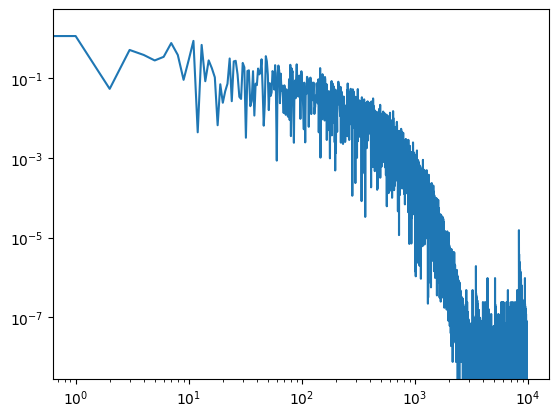

In [187]:
plt.plot(np.abs(listtau))
plt.yscale('log')
plt.xscale('log')

In [188]:
np.max(vvval) - valsol, np.linalg.norm(A@optvv)**2 - valsol

NameError: name 'valsol' is not defined

NameError: name 'valsol' is not defined

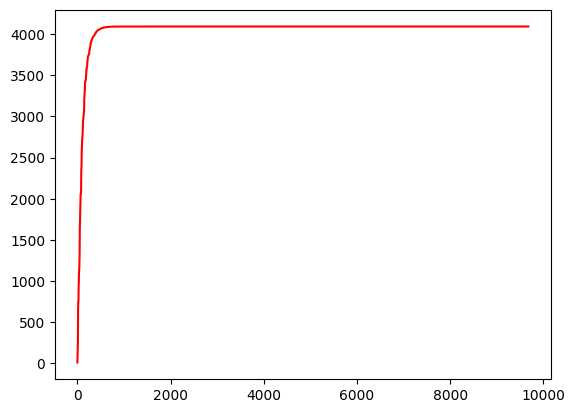

In [189]:
line1, = plt.plot(np.where(vvval == 0, np.max(vvval),vvval), 'r', label='$\|A v^{(k)}\|_2^2$')
line2, = plt.plot(valsol*np.ones(1000000), 'b', label='$\|A\|_{op}$')
plt.legend(handles=[line1, line2])
plt.xscale('log')
plt.yscale('log')

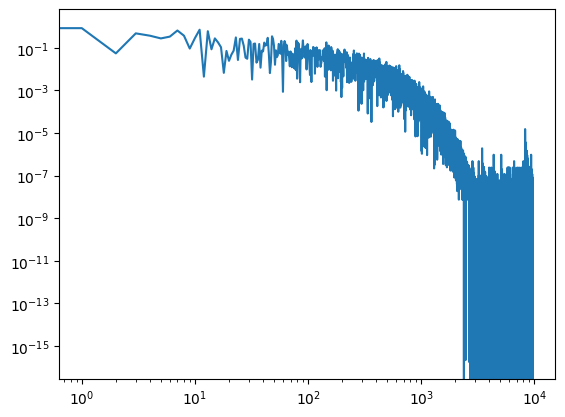

In [190]:
plt.plot(listerror)
plt.yscale('log')
plt.xscale('log')

In [214]:
vu, optvu, vvddual, listtau_uv, lista_uv, listerror_uv = adjointfreenorm.MatFreeAdjOpNormDouble(A, V, iter=100001, eps=1e-10, nor=1)

iter. 	| func-value 	| res.  	| tau+sig  	| alpha 	| beta 		| gamma 	| delta 	| q^(1)(tau,sig) 	| q^(2)(tau, sig) 	| sample 	| error 	| sing-vec
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
0 	| -3.643e+00 	|  2.657e+01 	| --- 		| --- 		| --- 		| --- 		| --- 		| --- 		| --- 			| --- 			| --- 		| ---
1000 	|  2.250e+01 	|  4.232e-01 	|  2.025e-03 	|  2.250e+01 	| -2.163e-02 	|  6.342e-02 	|  1.862e+00 	|  2.855e-13 		|  1.000e+00 		| 1 		|  3.491e-03 	|  7.414e-02
2000 	|  2.286e+01 	|  6.191e-02 	|  2.284e-03 	|  2.286e+01 	|  6.709e-02 	| -1.252e-02 	| -1.031e+00 	|  1.455e-12 		|  1.000e+00 		| 1 		|  3.647e-03 	|  2.346e-02
3000 	|  2.290e+01 	|  2.412e-02 	| -1.526e-03 	|  2.290e+01 	| -3.808e-02 	|  3.126e-03 	| -4.940e-03 	|  1.290e-13 		|  1.000e+00 		| 1 		|  1.800e-03 	|  6.891e-03
4000 	|  2.291e+01 	|  1.835e-02 	| -7.894e-04 	|  2.291e+01 	| -1.637e-02 	| -

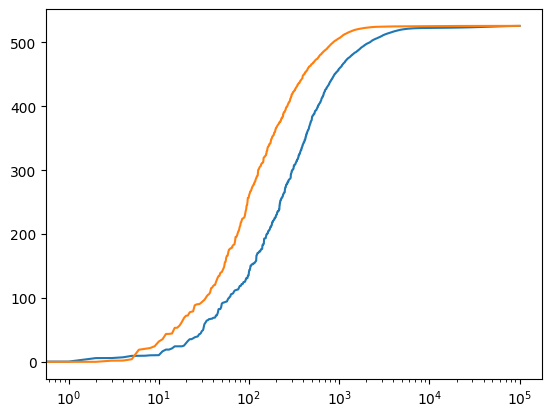

In [220]:
plt.semilogx(vvvual)
plt.semilogx(vvddual**2)

In [218]:
vu, optvu, vvvual, listtau_uv, lista_uv, listerror_uv = adjointfreenorm.MatFreeAdjOpNorm(A=A, V=V, iter=100001, eps=1e-10, nor=1)

iter. 	| func-value 	| res.  	| tau  		| alpha 	| beta  	| h^(1)(tau) 	| h^(2)(tau) 	| sample 	| error 	| sing-vec
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
0 	|  8.491e-02 	|  5.255e+02 	| --- 		| --- 		| --- 		| --- 		| --- 		| --- 		| --- 		| ---
1000 	|  4.588e+02 	|  6.679e+01 	|  3.345e-03 	|  1.415e-01 	| -4.229e+01 	| -5.185e-13 	| -4.229e+01 	| 1 		|  6.691e-03 	|  1.489e-01
2000 	|  4.972e+02 	|  2.836e+01 	| -3.710e-03 	| -1.804e-01 	| -4.863e+01 	| -1.229e-13 	| -4.863e+01 	| 1 		|  7.420e-03 	|  6.359e-02
3000 	|  5.101e+02 	|  1.543e+01 	| -1.632e-03 	| -6.761e-02 	| -4.142e+01 	|  3.967e-13 	| -4.142e+01 	| 1 		|  3.264e-03 	|  4.820e-02
4000 	|  5.166e+02 	|  8.924e+00 	|  2.108e-03 	|  1.021e-01 	| -4.840e+01 	|  6.600e-13 	| -4.840e+01 	| 1 		|  4.217e-03 	|  3.178e-02
5000 	|  5.200e+02 	|  5.581e+00 	|  2.177e-03 	|  1.006e-01 	| -4.621e+01 	|  1

In [120]:
# set up the forward operator: Solve the ode dy/dt = M(t)*y on t in [0,tend]
# operator A maps x(0) to x(tend)
# dimension of state space
n = 100
# system matrices
M0 = -np.eye(n)
Q,R = np.linalg.qr(np.random.randn(n,n))
# time dependent matrix for the rhs
def M(t):
    return 0.1*M0 + 1*Q/(t+0.1)
# rhs of ODE
def fun(t,x):
    return M(t)@x
tend = 70
t0 = 0
def A(x):
    sol = sc.integrate.solve_ivp(fun,[t0,tend],x) # uses RK45 if I got documentation right
    return sol.y[:,-1] 

In [121]:
vv, optvv, vvval, listtau, lista, listerror = adjointfreenorm.MatFreeAdjNormCont(A=A, iter=100001, eps=1e-12, dim=n, nor=1)

iter. 	| func-value 	| tau  		| alpha 	| beta  	| h^(1)(tau) 	| h^(2)(tau) 	| update 	| error
----------------------------------------------------------------------------------------------------------------------------------------------
0 	|  2.272e-02 	| --- 		| --- 		| --- 		| --- 		| --- 		| --- 		| ---
1000 	|  4.048e-01 	| -5.350e-03 	| -1.989e-03 	| -3.718e-01 	| -1.417e-15 	| -3.719e-01 	| 1 		|  5.350e-03
2000 	|  4.097e-01 	| -8.868e-04 	| -3.458e-04 	| -3.899e-01 	|  2.598e-15 	| -3.899e-01 	| 1 		|  8.868e-04
3000 	|  4.097e-01 	| -1.129e-04 	| -4.371e-05 	| -3.873e-01 	|  1.174e-13 	| -3.873e-01 	| 1 		|  1.129e-04
4000 	|  4.097e-01 	|  2.538e-06 	|  1.004e-06 	| -3.957e-01 	|  8.499e-12 	| -3.957e-01 	| 1 		|  2.538e-06
5000 	|  4.097e-01 	|  1.806e-06 	|  6.891e-07 	| -3.816e-01 	| -9.616e-12 	| -3.816e-01 	| 1 		|  1.806e-06
6000 	|  4.097e-01 	| -9.313e-08 	| -3.554e-08 	| -3.808e-01 	| -7.132e-11 	| -3.808e-01 	| 1 		|  9.313e-08
7000 	|  4.097e-01 	|  3.092e-07 	|  1

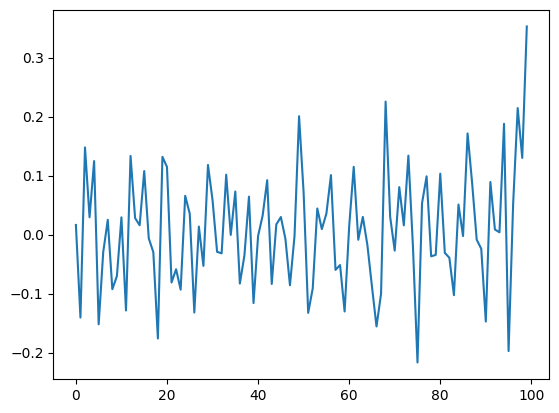

In [122]:
plt.plot(vv)

In [340]:
#n = 50
def func(v, n):
    x = np.linspace(0,1,n)
    f = sc.interpolate.interp1d(x, v, kind='quadratic')

    # f = kernel * f

    return f

def k1(t,u):
    return t - u

def k2(t,u):
    return np.exp(t - u)

def k3(t,u):
    return t**2 - u**2

def A(v, n=100, m=100):
    f = func(v, n)
    I = np.array([sc.integrate.quad(f, 0, (i+1)/m)[0] for i in range(m)])
    
    # I = np.array([sc.integrate.simpson(v[0:i] * k3(np.linspace(0,i/n,i)[0:i], i/n) , x=np.linspace(0,i/n,i)[0:i]) for i in range(1,m+1)])
    
    return I

In [341]:
vv, optvv, vvval, listtau, lista, listerror = adjointfreenorm.MatFreeAdjNormCont(A=A, iter=1001, eps=1e-10, dim=100, nor=1, pr=100)

iter. 	| func-value 	| tau  		| alpha 	| beta  	| h^(1)(tau) 	| h^(2)(tau) 	| update 	| error
----------------------------------------------------------------------------------------------------------------------------------------------


/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_1053/3937650507.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = np.array([sc.integrate.quad(f, 0, (i+1)/m)[0] for i in range(m)])


0 	|  8.413e-03 	| --- 		| --- 		| --- 		| --- 		| --- 		| --- 		| ---


KeyboardInterrupt: 

In [336]:
A(vv)

array([ 0.00000000e+00, -1.89991830e-07, -2.78262961e-06, -5.97567211e-06,
       -1.29072447e-05, -2.16082881e-05, -3.56426287e-05, -5.23701900e-05,
       -7.60464816e-05, -1.03318664e-04, -1.39144241e-04, -1.79434967e-04,
       -2.29866724e-04, -2.85638295e-04, -3.53062227e-04, -4.26653621e-04,
       -5.13436580e-04, -6.07319608e-04, -7.15876792e-04, -8.32322495e-04,
       -9.64958108e-04, -1.10630125e-03, -1.26523914e-03, -1.43370241e-03,
       -1.62116774e-03, -1.81887096e-03, -2.03685869e-03, -2.26587319e-03,
       -2.51637090e-03, -2.77862524e-03, -3.06351336e-03, -3.36085360e-03,
       -3.68203429e-03, -4.01623086e-03, -4.37538513e-03, -4.74821870e-03,
       -5.14699714e-03, -5.56012989e-03, -6.00005599e-03, -6.45490246e-03,
       -6.93733801e-03, -7.43518446e-03, -7.96133048e-03, -8.50352183e-03,
       -9.07472951e-03, -9.66245219e-03, -1.02797522e-02, -1.09139804e-02,
       -1.15782380e-02, -1.22598133e-02, -1.29716547e-02, -1.37013776e-02,
       -1.44614118e-02, -

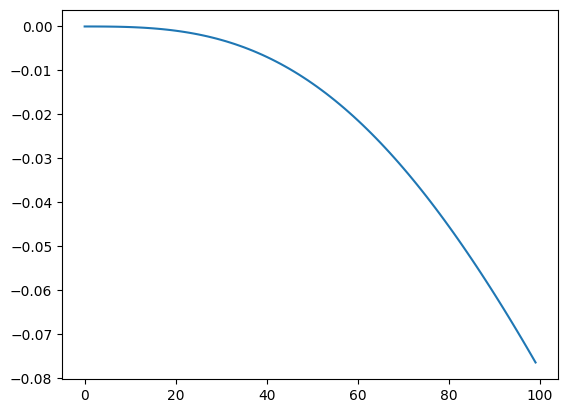

In [337]:
plt.plot(A(vv))

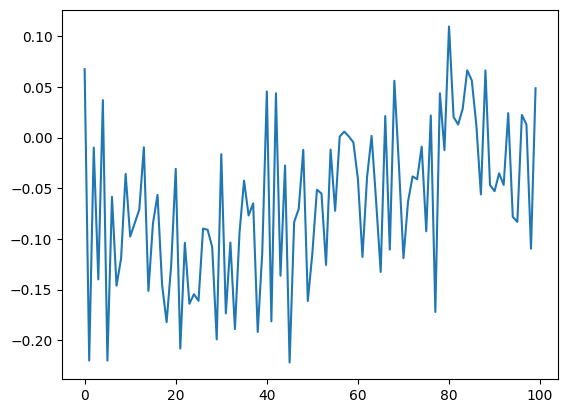

In [334]:
plt.plot(vv)

### Radon transform

In [519]:
N = 100

In [520]:
def A_Radon(x):
    N = 100
    numAng = 150
    theta = np.linspace(0.0 , 180 , numAng , endpoint = False )
    x = np.reshape(x, (N, N))

    Ax = radon (x , theta = theta)

    M = np.size(Ax)
    Ax = np.reshape(Ax, M)

    return Ax

In [524]:
radon_sig_v, opt_radon_sig_v, radon_val, listtau_r, lista_r, listerror_r = adjointfreenorm.MatFreeAdjNormCont(A= lambda v:A_Radon(v), iter=100001, eps=1e-16, dim=N**2, nor=1)

iter. 	| func-value 	| tau  		| alpha 	| beta  	| h^(1)(tau) 	| h^(2)(tau) 	| update 	| error
----------------------------------------------------------------------------------------------------------------------------------------------
0 	|  8.661e+01 	| --- 		| --- 		| --- 		| --- 		| --- 		| --- 		| ---
1000 	|  1.301e+03 	| -5.719e-03 	| -6.942e+00 	| -1.214e+03 	|  1.266e-11 	| -1.214e+03 	| 1 		|  5.719e-03
2000 	|  2.447e+03 	|  2.343e-03 	|  5.530e+00 	| -2.360e+03 	|  2.318e-11 	| -2.360e+03 	| 1 		|  2.343e-03
3000 	|  3.510e+03 	|  2.081e-02 	|  7.118e+01 	| -3.419e+03 	|  1.620e-12 	| -3.422e+03 	| 1 		|  2.080e-02
4000 	|  4.409e+03 	| -3.939e-03 	| -1.702e+01 	| -4.321e+03 	| -2.252e-11 	| -4.321e+03 	| 1 		|  3.939e-03
5000 	|  5.280e+03 	| -6.625e-03 	| -3.440e+01 	| -5.192e+03 	| -1.035e-11 	| -5.192e+03 	| 1 		|  6.625e-03
6000 	|  6.045e+03 	|  3.164e-03 	|  1.884e+01 	| -5.956e+03 	| -1.605e-10 	| -5.957e+03 	| 1 		|  3.164e-03
7000 	|  6.735e+03 	|  1.041e-02 	|  6

KeyboardInterrupt: 

In [380]:
np.sqrt(np.max(radon_val))

91.8118605470078

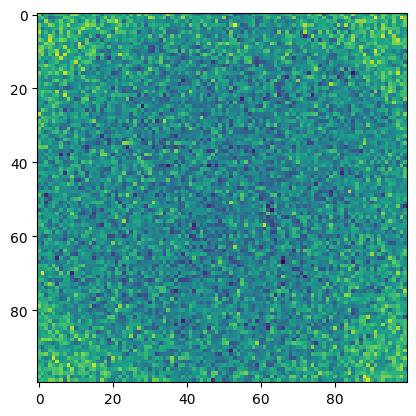

In [379]:
plt.imshow(radon_sig_v.reshape((N,N)))

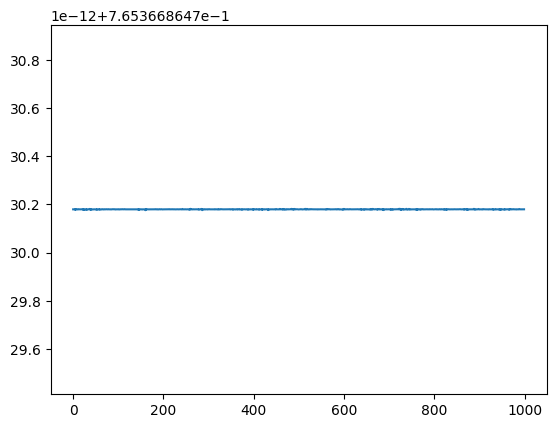

In [250]:
plt.plot(listerror_r)

### Fouier Transformation

In [617]:
N = 10

In [666]:
def A_Fouier(x):
    # np.random.seed(4242)
    x = np.reshape(x, (N, N))
    # x = np.reshape(x, N)

    Ax = cv2.dft(x , flags = cv2.DFT_COMPLEX_OUTPUT)
    #Ax = cv2.dft(x , flags = cv2.DFT_REAL_OUTPUT)
    M = np.size(Ax[:,:,0])
    #M = np.size(Ax)
    Ax = np.reshape(Ax[:,:,0], M) + 1j*np.reshape(Ax[:,:,1], M)
    #Ax = np.reshape(Ax, M) 

    return Ax

In [667]:
img = np.random.randn(10,10)

np.linalg.norm(A_Fouier(img)**2)

1666.2181130433953

In [668]:
fouier_sig_v, opt_fouier_sig_v, fouier_val, listtau_f, lista_f, listerror_f = adjointfreenorm.MatFreeAdjNormCont(A= lambda v:A_Fouier(v), iter=10001, eps=1e-10, dim=N**2)

iter. 	| func-value 	| tau  		| alpha 	| beta  	| h^(1)(tau) 	| h^(2)(tau) 	| update 	| error
----------------------------------------------------------------------------------------------------------------------------------------------
0 	|  1.000e+02 	| --- 		| --- 		| --- 		| --- 		| --- 		| --- 		| ---
A is orthogonal/unitar with ||A||^2 =  99.99999999999996 a_0 =  -1.3322676295501878e-15


In [670]:
fouier_sig_v

array([ 0.12919226, -0.04350719,  0.13280887, -0.08568589, -0.013181  ,
       -0.02627585,  0.14819962,  0.14391891,  0.03334236, -0.08206268,
       -0.08591959,  0.03159055, -0.11250542,  0.15531878,  0.02327853,
       -0.07700399, -0.01770034, -0.01574337,  0.04436107, -0.0248939 ,
       -0.21588819,  0.0973052 , -0.08817023,  0.02010672, -0.01072592,
        0.00350512,  0.07048919, -0.13240599,  0.09931952, -0.10608315,
        0.12454746, -0.10795272,  0.07438989,  0.11301011,  0.12771392,
        0.09277359, -0.04892855,  0.07305074, -0.16627047,  0.04341888,
        0.06917779,  0.06990651, -0.06327522, -0.16824184, -0.03448049,
       -0.12775871, -0.01724051, -0.20260177, -0.12259108,  0.1244026 ,
        0.08287098, -0.04798006, -0.03874771,  0.09918944,  0.07178257,
        0.07457211, -0.03591386,  0.07593105,  0.06229224,  0.12801733,
        0.16233583, -0.12509516, -0.21227345, -0.11736426,  0.04352131,
       -0.08263168, -0.09249984, -0.27436801,  0.11345441, -0.14

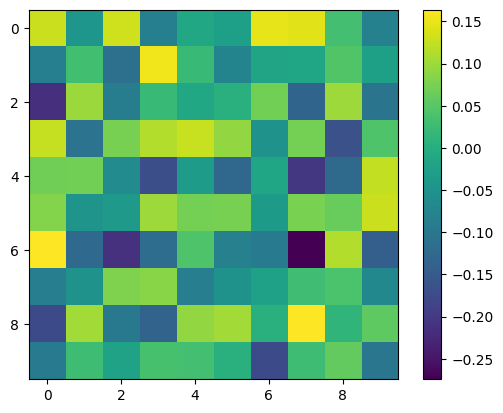

In [669]:
plt.imshow(fouier_sig_v.reshape((N,N)))
plt.colorbar()

In [545]:
v = np.ones(10) 
v = v / np.linalg.norm(v)
x = adjointfreenorm.sampx(v, 1)
np.sum(v * x)

-1.3877787807814457e-17

In [582]:
N = 100
v = np.random.randn(N ,N)
v = v / np.linalg.norm(v)
v_x = adjointfreenorm.sampx(v.reshape(N**2), 1)
print(np.linalg.norm(v_x))

print(np.sum(v * v_x.reshape(N,N)))

Av = cv2.dft(v , flags = cv2.DFT_REAL_OUTPUT)
Av = cv2.dft(v , flags = cv2.DFT_COMPLEX_OUTPUT)
invAAv = cv2.idft(Av / N**2, flags = cv2.DFT_REAL_OUTPUT)
invAAv = cv2.idft(Av / N**2, flags = cv2.DFT_COMPLEX_OUTPUT)
print(np.linalg.norm(invAAv[:,:,0] - v))

Av_x = cv2.dft(v_x.reshape(N,N), flags = cv2.DFT_REAL_OUTPUT)
Av_x = cv2.dft(v_x.reshape(N,N), flags = cv2.DFT_COMPLEX_OUTPUT)

print(np.sum(invAAv[:,:,0] * v_x.reshape(N,N)))
print(np.sum((Av_x[:,:,0] + Av_x[:,:,1] * 1j) * (Av[:,:,0] - Av[:,:,1] * 1j)))

1.0000000000000002
-3.469446951953614e-18
4.290323094436144e-16
-2.6020852139652106e-18
(-3.552713678800501e-14+5.329070518200751e-15j)


### The Bound of smallest \esp enviroment 

In [5]:
def eps_bound(s):
    return s**2 * 1 / np.sqrt((s**2 - 2)**2 + 124)

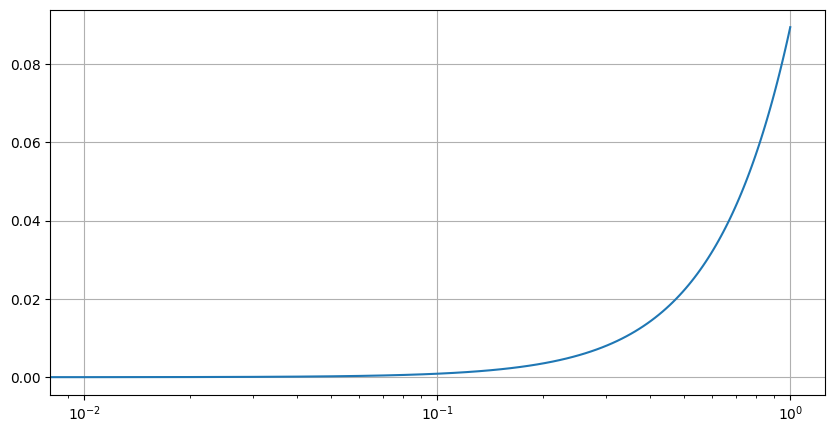

In [54]:
s = np.linspace(0,1,100)
plt.figure(figsize=(10,5))
plt.semilogx(s, eps_bound(s))

# x_ticks = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.5, 1] 
# y_ticks = np.linspace(0, 0.1, 10)

# plt.xticks(x_ticks)
# plt.yticks(y_ticks)

plt.grid()